In [1]:
import numpy as np
import spaudiopy as spa

In [2]:
# sampling frequency
fs = 48000
# length in s
l = 0.5
# define a mono input signal (only pulsed noise here)
sig_in = spa.process.pulsed_noise(l, l, fs, reps=3)

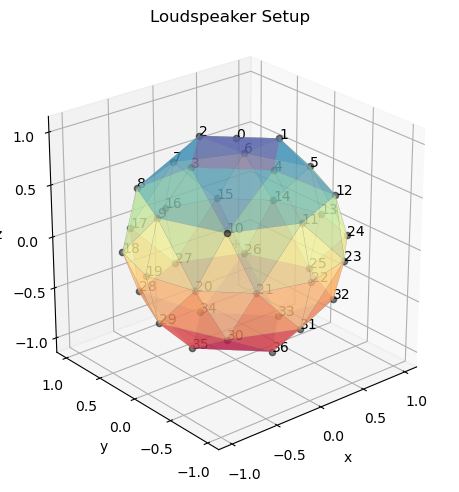

In [3]:
# load a loudspeaker layout
ls_layout = spa.io.load_layout('../data/ls_layouts/Aalto_subset_C.json')
ls_layout.show()

In [4]:
# define auralization (front)
src_coords = [1, 0, 0]
# define decoding, using vbap as simple example
ls_gains = spa.decoder.vbap(src_coords, ls_layout)
ls_sigs = ls_layout.loudspeaker_signals(ls_gains, sig_in)

In [5]:
# binaural simulation of this setup
s_left, s_right = ls_layout.binauralize(ls_sigs, fs)

# for convenience we could now make a signal object and listen to it
spa.sig.MultiSignal([s_left, s_right], fs=fs).play()

ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
